
Бинарная классификация сортов Ириса методом опорных векторов

Формулировка задачи

Требуется разделить 2 сорта Ириса (бинарная классификация) методом опорных векторов (SVM). Данные берутся из открытого источника: https://archive.ics.uci.edu/ml/datasets/Iris.
Выполнять это разделение мы будем на основе двух признаков из датасета.

Описание модели
Метки классов могут принимать значения $Y = \{-1, +1\}$. Объект — вектор c N признаками $x = (x_1, x_2, …, x_n)$ в пространстве $R^n$. При обучении алгоритм должен построить функцию $F(x)=y$, которая принимает в себя аргумент $x$ — объект из пространства $R^n$ и выдает метку класса $y$.
Главная цель SVM как классификатора — найти уравнение разделяющей гиперплоскости
$w_1x_1+w_2x_2+…+w_nx_n+w_0=0$ в пространстве $R^n$, которая бы разделила два класса неким оптимальным образом. Общий вид преобразования $F$ объекта $x$ в метку класса $Y$: 
$$F(x) = sign(w^Tx-b)$$
В нашем случае разделяющая плоскость будет задаваться уравнением вида:
$$
w\cdot x^{T}-b=0
$$
$$
\left ( w_1, w_2 \right )\cdot\begin{pmatrix}
x
\\ 
y
\end{pmatrix}
-b=0
$$
$w$ и $b$ - веса нашего алгоритма

Как уже говорилось выше, цель нашей модели - обучиться на наборе тренировочных данных $\left \{ (x_1, y_1), . . . ,(x_m, y_m)\right \} ∈ (R^n × \left \{ +1, −1\right \})^m$, имеющие неизвестную функцию распределения $p^*(x, y)$.


In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
data = pandas.read_csv("iris.data")
data = data.drop(data[data.Class == "Iris-virginica"].index)

array([[<AxesSubplot: xlabel='p1', ylabel='p1'>,
        <AxesSubplot: xlabel='p2', ylabel='p1'>,
        <AxesSubplot: xlabel='p3', ylabel='p1'>,
        <AxesSubplot: xlabel='p4', ylabel='p1'>],
       [<AxesSubplot: xlabel='p1', ylabel='p2'>,
        <AxesSubplot: xlabel='p2', ylabel='p2'>,
        <AxesSubplot: xlabel='p3', ylabel='p2'>,
        <AxesSubplot: xlabel='p4', ylabel='p2'>],
       [<AxesSubplot: xlabel='p1', ylabel='p3'>,
        <AxesSubplot: xlabel='p2', ylabel='p3'>,
        <AxesSubplot: xlabel='p3', ylabel='p3'>,
        <AxesSubplot: xlabel='p4', ylabel='p3'>],
       [<AxesSubplot: xlabel='p1', ylabel='p4'>,
        <AxesSubplot: xlabel='p2', ylabel='p4'>,
        <AxesSubplot: xlabel='p3', ylabel='p4'>,
        <AxesSubplot: xlabel='p4', ylabel='p4'>]], dtype=object)

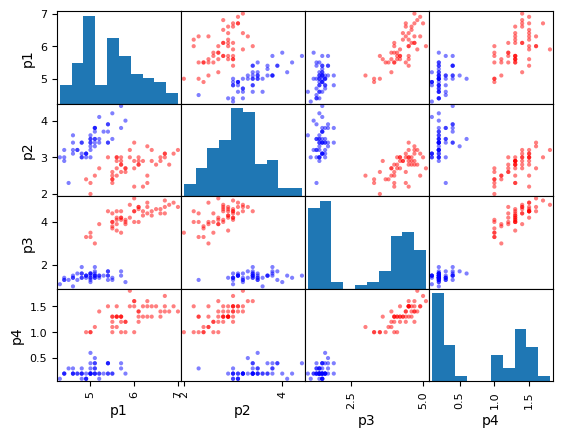

In [4]:
col = {"support_v": "green", "Iris-versicolor": 'red',"Iris-setosa": "blue"}
data['Color'] = data["Class"].map(col)
pandas.plotting.scatter_matrix(data, c=data["Class"].map(col))

In [5]:
svc_model = SVC(kernel='linear', gamma='auto')
train, test = train_test_split(data, test_size=0.5)

In [6]:
svc_model.fit(train[['p3','p4']], train['Class'])

SVC(gamma='auto', kernel='linear')

In [7]:
pred = svc_model.predict(test[['p3','p4']])
print(confusion_matrix(test['Class'], pred))
print(classification_report(test['Class'], pred))

[[26  0]
 [ 0 24]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        26
Iris-versicolor       1.00      1.00      1.00        24

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [8]:
support_v = pandas.DataFrame(svc_model.support_vectors_, columns = ['p3','p4'])
support_v['Class'] = 'support_v'
support_v

,p3,p4,Class
0,1.9,0.4,support_v
1,3.3,1.0,support_v


c:\Users\abdul\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='p3', ylabel='p4'>

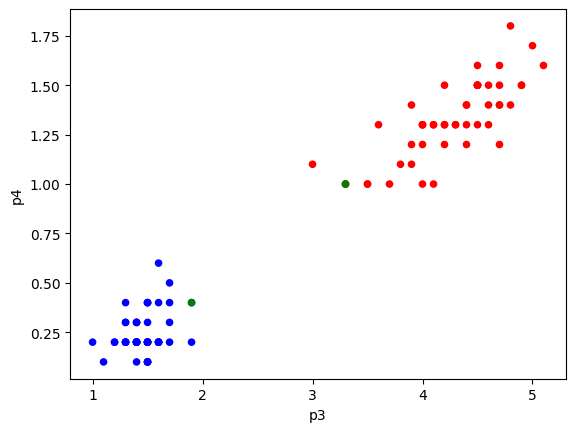

In [9]:
data1 = pandas.concat([data, support_v])
data1['Color'] = data1["Class"].map(col)
data1[['p3', 'p4']].plot(x='p3', y='p4', kind = 'scatter', c=data1["Class"].map(col))

w = [1.2068965356548553, 0.5172413724235094]
b = -3.500000109604354


c:\Users\abdul\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


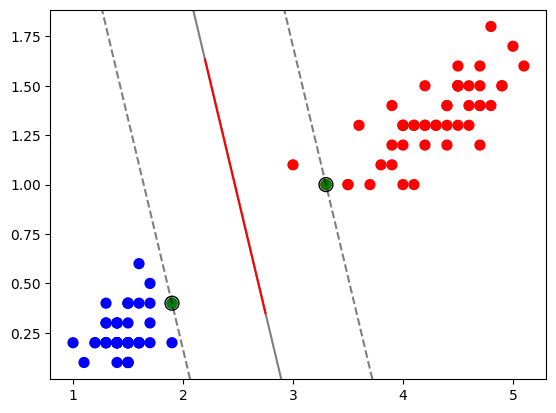

In [15]:
ax = plt.gca()
plt.scatter(data1['p3'], data1['p4'], c=data1["Class"].map(col), s=50)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

w = svc_model.coef_[0]
print(f'w = [{w[0]}, {w[1]}]\nb = {svc_model.intercept_[0]}')

w = svc_model.coef_[0]
b = svc_model.intercept_[0]
x_points = np.linspace(2.2, 2.75)
y_points = -(w[0] / w[1]) * x_points - b / w[1]
plt.plot(x_points, y_points, c='r');

plt.show()

In [11]:
print(f'w = [{w[0]}, {w[1]}]\na = {w[0] / w[1]}\nb = {b}')

w = [1.2068965356548553, 0.5172413724235094]
a = 2.3333333333333335
b = -3.500000109604354
